In [1]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 7.3 MB/s 


## TIme series data → Image

In [2]:
import PIL
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


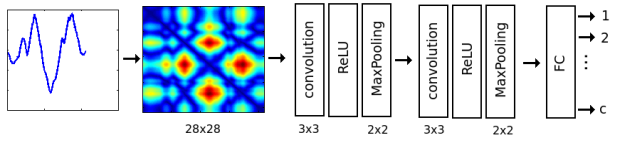

In [4]:
rec = Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/rec2.png')
rec

### 1. Recurrence Plot

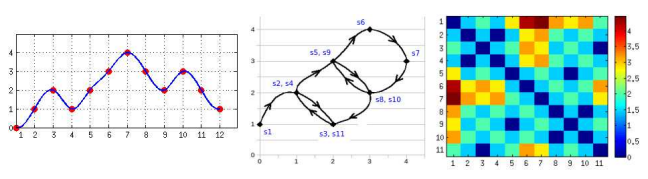

In [5]:
rec2 = Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/rec.png')
rec2

1. Time series data의 m차원 공간 궤적을 구한다.<br>
s1:(x1,x2), s2:(x2,x3),.., s11
2. m차원 공간 궤적을 이용하여 거리행렬을 구한다.<br>
각 포인트간 거리를 엡실론과 비교하여 1, 0으로 나타낸다.

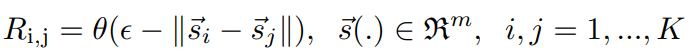

In [6]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/rec_dis.png')

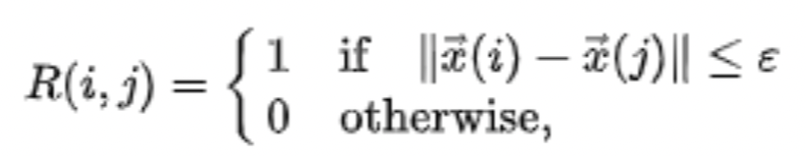

In [7]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/RNN_VIT/rcp.png')

In [8]:
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot

* Data Load

In [9]:
bunch = load_gunpoint()
print(bunch.data_train.shape, bunch.data_test.shape)

(50, 150) (150, 150)


In [11]:
bunch.data_train
# train : 150개의 값을 가진 time series data가 50개

array([[-0.6478854 , -0.64199155, -0.63818632, ..., -0.64042873,
        -0.63866571, -0.63865722],
       [-0.64442658, -0.64540093, -0.64705511, ..., -0.6349345 ,
        -0.6344968 , -0.63159565],
       [-0.77835282, -0.77827907, -0.77715084, ..., -0.70419626,
        -0.70760524, -0.7071202 ],
       ...,
       [-0.77912617, -0.77837863, -0.7757449 , ..., -0.50500603,
        -0.50373099, -0.50438486],
       [-0.70303339, -0.70261754, -0.70250356, ..., -0.64113375,
        -0.64140622, -0.64210896],
       [-1.4357199 , -1.4322717 , -1.4329285 , ..., -1.4354619 ,
        -1.4352821 , -1.4308845 ]])

* Data 시각화

In [12]:
import matplotlib.pyplot as plt

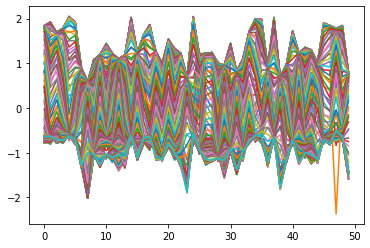

In [13]:
plt.plot(bunch.data_train)
plt.show()

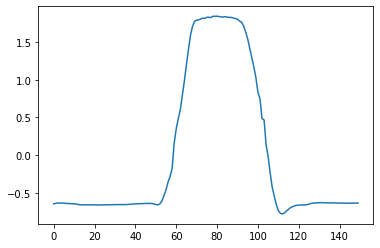

In [14]:
plt.plot(bunch.data_train[0])
plt.show()

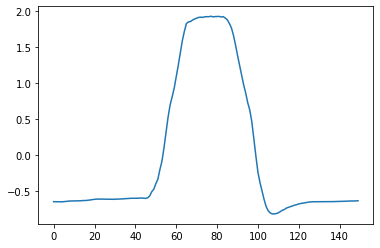

In [15]:
plt.plot(bunch.data_train[1])
plt.show()

* train/test split

In [16]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
# X와 y만 필요
# train, test split

* Image로 변환

In [17]:
transformer = RecurrencePlot(dimension=1, time_delay=1, threshold='point', percentage=10, flatten=False)
# float or int, 디폴트 1
# 궤적의 연속된 두 지점 사이의 간격 float or int,
# 최소거리에 대한 임계값(None, point:백분율, distance) : 임계값을 어떤식으로 표현할 것인지
# True 이면 이미지가 1차원 병합 2차원으로 출력할 것

In [18]:
X_train_new = transformer.transform(X_train)
X_train_new.shape

(50, 150, 150)

* 원본 시계열

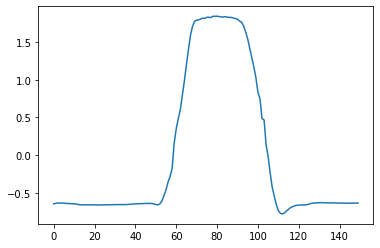

In [19]:
plt.plot(bunch.data_train[0])
plt.show()

* 변환한 이미지

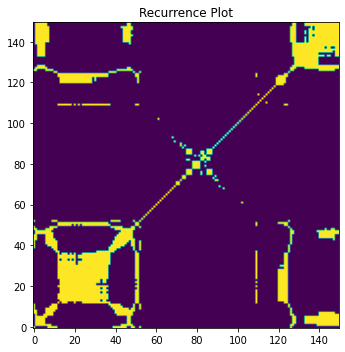

In [20]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train_new[0], origin='lower')
plt.title('Recurrence Plot')
plt.tight_layout()
plt.show()

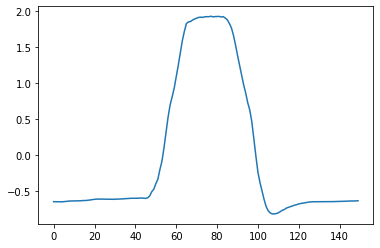

In [21]:
plt.plot(bunch.data_train[1])
plt.show()

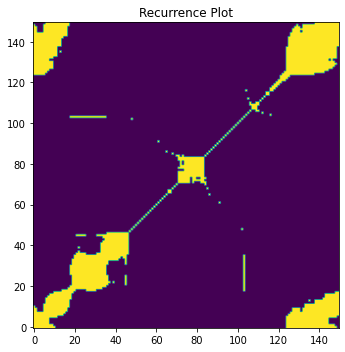

In [22]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train_new[1], origin='lower')
plt.title('Recurrence Plot')
plt.tight_layout()
plt.show()

* test도 적용

In [23]:
X_test_new = transformer.transform(X_test)
X_test_new.shape

(150, 150, 150)

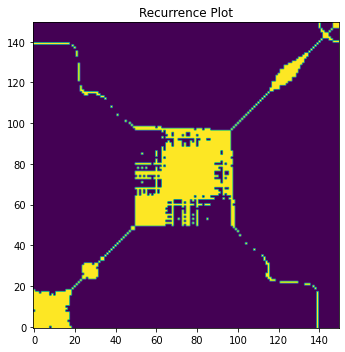

In [24]:
plt.figure(figsize=(5, 5))
plt.imshow(X_test_new[0], origin='lower')
plt.title('Recurrence Plot')
plt.tight_layout()
plt.show()

* Modeling : 시계열 자체가 단순하여 딥러닝 모델보다 기존 머신러닝 모델에서 더 성능이 좋다.

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [26]:
X_train_new.shape

(50, 150, 150)

In [27]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
logistic = LogisticRegression(solver='liblinear')
recurrence = RecurrencePlot(dimension=1, time_delay=1, threshold='point', percentage=10, flatten=False)

In [28]:
X_train_new = transformer.transform(X_train)
X_train_new.shape

(50, 150, 150)

In [29]:
X_test_new = transformer.transform(X_test)
X_test_new.shape

(150, 150, 150)

* 데이터 시각화

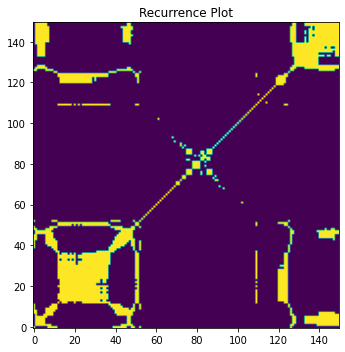

In [30]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train_new[0], origin='lower')
plt.title('Recurrence Plot')
plt.tight_layout()
plt.show()

* 데이터 처리 후, 모델에 입력

In [31]:
nsamples, nx, ny = X_train_new.shape
train_X = X_train_new.reshape((nsamples,nx*ny))

In [32]:
nsamples, nx, ny = X_test_new.shape
test_X = X_test_new.reshape((nsamples,nx*ny))

In [33]:
clf = make_pipeline(logistic)
clf.fit(train_X, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(solver='liblinear'))])

In [34]:
clf.score(test_X, y_test)

0.8866666666666667

### 2. Gramian Angular Field

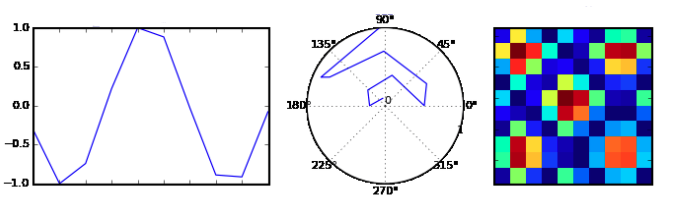

In [35]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/gra1.png')

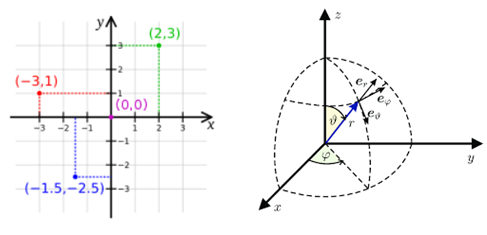

In [36]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/cp.png')

1. Time series data를 극좌표계 방식으로 변환<br>
평면위의 위치와 각도로 표현하는 방식
2. 극좌표계의 Gramian matrix 계산

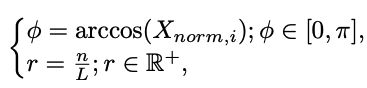

In [37]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/tran1.png')

* GASF & GADF<br>
GASF : 극좌표 시계열 데이터의 각도의 합으로 표현<br>
GADP : 각도의 차이로 표현

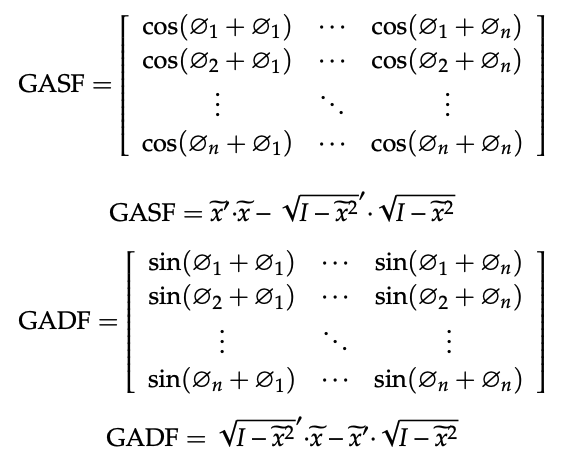

In [38]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/tran2.png')

* Data load

In [39]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

* Image로 변환

In [40]:
from pyts.image import GramianAngularField

* GASF

In [42]:
gasf = GramianAngularField(image_size=24, method='summation')
x_gasf = gasf.fit_transform(X_train)

In [43]:
x_gasf.shape

(50, 24, 24)

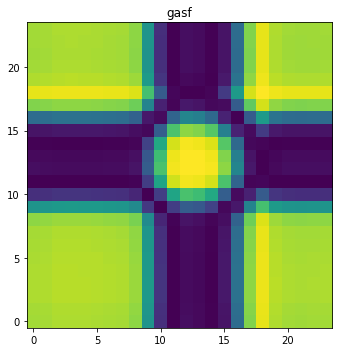

In [44]:
plt.figure(figsize=(5, 5))
plt.imshow(x_gasf[0], origin='lower')
plt.title('gasf')
plt.tight_layout()
plt.show()

* GADF

In [45]:
gadf = GramianAngularField(image_size=24, method='difference')
x_gadf = gadf.fit_transform(X_train)

In [46]:
x_gadf.shape

(50, 24, 24)

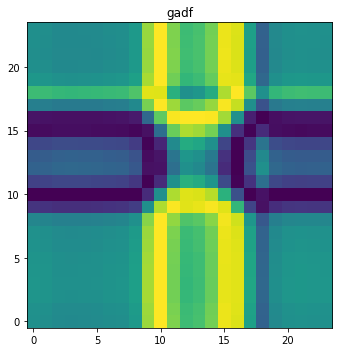

In [47]:
plt.figure(figsize=(5, 5))
plt.imshow(x_gadf[0], origin='lower')
plt.title('gadf')
plt.tight_layout()
plt.show()

* Model

1) Gasf

In [48]:
nsamples, nx, ny = x_gasf.shape
train_X = x_gasf.reshape((nsamples,nx*ny))

In [49]:
logistic = LogisticRegression(solver='liblinear')
clf = make_pipeline(logistic)
clf.fit(train_X, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(solver='liblinear'))])

In [50]:
gasf = GramianAngularField(image_size=24, method='summation')
x_gasf_test = gasf.fit_transform(X_test)

In [51]:
nsamples, nx, ny = x_gasf_test.shape
test_X = x_gasf_test.reshape((nsamples,nx*ny))

In [52]:
clf.score(test_X, y_test)

0.96

2) Gadf

In [53]:
nsamples, nx, ny = x_gadf.shape
train_X = x_gadf.reshape((nsamples,nx*ny))

In [54]:
logistic = LogisticRegression(solver='liblinear')
clf = make_pipeline(logistic)
clf.fit(train_X, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(solver='liblinear'))])

In [55]:
gadf = GramianAngularField(image_size=24, method='difference')
x_gadf_test = gadf.fit_transform(X_test)

In [56]:
nsamples, nx, ny = x_gadf_test.shape
test_X = x_gadf_test.reshape((nsamples,nx*ny))

In [57]:
clf.score(test_X, y_test)

0.9466666666666667

### 3. Markov Transition Field

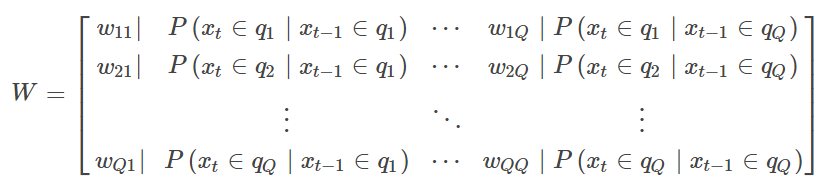

In [58]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/mar1.png')

1. Time series data를 값에 따라 Q구간으로 분할.<br>
2. 시간 인덱스 ti의 data에 맞는 구간에 배정.<br>
3. 시간 축으로 마르코프 체인 방식으로 QxQ 크기의 가중치 인접 행렬 w 구하기.<br>
 → w는 qi에서 qj로 전이하는 빈도를 나타냄.

* W의 각 열의 합을 1로 정규화하여 전이 매트릭스를 구하기. 
 → Mij는 시간 인덱스 ti일때 데이터의 값이 속한 구간 qi에서 시간 인덱스 tj의 데이터 값이 속한 구간 qj로 전이될 확률을 의미.

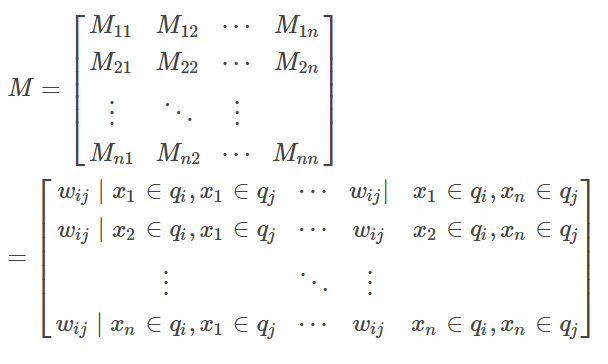

In [59]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/09/mar2.png')

* Data load

In [60]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

* Image로 변환

In [61]:
from pyts.image import MarkovTransitionField
transformer = MarkovTransitionField()

In [62]:
X_train_new = transformer.transform(X_train)
X_train_new.shape

(50, 150, 150)

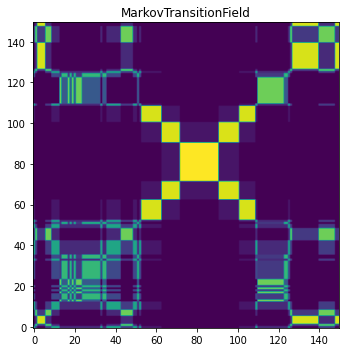

In [63]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train_new[0], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

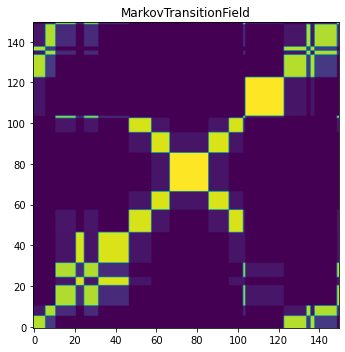

In [64]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train_new[1], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

* Modeling

In [65]:
nsamples, nx, ny = X_train_new.shape
train_X = X_train_new.reshape((nsamples,nx*ny))

In [66]:
logistic = LogisticRegression(solver='liblinear')
clf = make_pipeline(logistic)
clf.fit(train_X, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(solver='liblinear'))])

In [67]:
X_test_new = transformer.transform(X_test)
X_test_new.shape

(150, 150, 150)

In [68]:
nsamples, nx, ny = X_test_new.shape
test_X = X_test_new.reshape((nsamples,nx*ny))

In [69]:
clf.score(test_X, y_test)

0.8133333333333334